#Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import math
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# from keras.datasets import cifar10
# from keras.utils.np_utils import to_categorical  

import os
import csv

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import datetime 
from scipy import spatial

In [2]:
import sys

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
root_path = '/content/drive/MyDrive/CV_Project/'

In [5]:
dataset_path = '/content/drive/MyDrive/CV_Project/Dataset'

#Installing Requirements

In [6]:
!pip install torch==1.0.0
!pip install torchvision==0.2.1

In [7]:
!pip install scipy==1.1.0

  Using cached scipy-1.1.0-cp37-cp37m-manylinux1_x86_64.whl (31.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.4 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
image-quality 1.2.7 requires scipy>=1.3.0, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [8]:
!pip install image-quality

  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#Helper Functions

In [6]:
def getImgName(im_path):
  l = (im_path.split('/')[-1]).split('.')[0]
  print(l)
  return l

In [7]:
def saveToCsv(name, embed):
  tmpList = [name]
  for x in embed:
    tmpList.append(x)
  print(tmpList)
  # return
  newFile = ['Name']
  for x in range(len(embed)):
    newFile.append('Embedding_'+str(x))
  if(os.path.isfile(root_path + "DataEncodings.csv")):
    fileIn = open(root_path + 'DataEncodings.csv')
    csvreader = csv.reader(fileIn)
    for x in csvreader:
      if (x[0] == name):
        print('Name: ' + name + " already present!!!")
        return

    with open(root_path + "DataEncodings.csv", 'a+') as file:
      csvWrite = csv.writer(file)
      csvWrite.writerow(x for x in tmpList)
  else:
    with open(root_path + "DataEncodings.csv", 'a+') as file:
      csvWrite = csv.writer(file)
      csvWrite.writerow(x for x in newFile)
      csvWrite.writerow(x for x in tmpList)

In [8]:
def getEmbeddingfromCSV():
  csvHeader = []
  tmpList = []

  file = open(root_path + 'DataEncodings.csv')
  csvreader = csv.reader(file)
  csvHeader = next(csvreader)

  for r in csvreader:
    tmpList.append(r)
  
  embedList = [[x[0], np.array([float(y) for y in x[1:]])] for x in tmpList]
  return csvHeader, embedList

In [9]:
def takeAttendance(name):
  current_time = datetime.datetime.now()
  tmpList = [name]
  tmpList.append(current_time)
  newFile = ['Name', 'Date / Time']
  
  if(os.path.isfile(root_path + "Attendance.csv")):
    fileIn = open(root_path + 'Attendance.csv')
    csvreader = csv.reader(fileIn)
    for x in csvreader:
      if (x[0] == name):
        # print('Name: ' + name + " already present!!!")
        return

    with open(root_path + "Attendance.csv", 'a+') as file:
      csvWrite = csv.writer(file)
      csvWrite.writerow(x for x in tmpList)
  else:
    with open(root_path + "Attendance.csv", 'a+') as file:
      csvWrite = csv.writer(file)
      csvWrite.writerow(x for x in newFile)
      csvWrite.writerow(x for x in tmpList)


#Loading Images

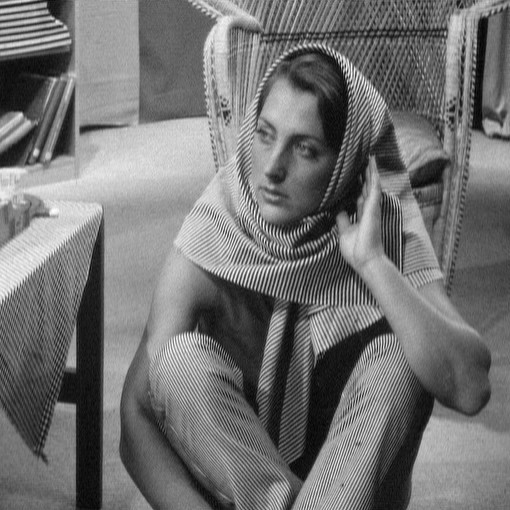

In [10]:
img = cv2.imread("/content/barbara.jpeg")
cv2_imshow(img)

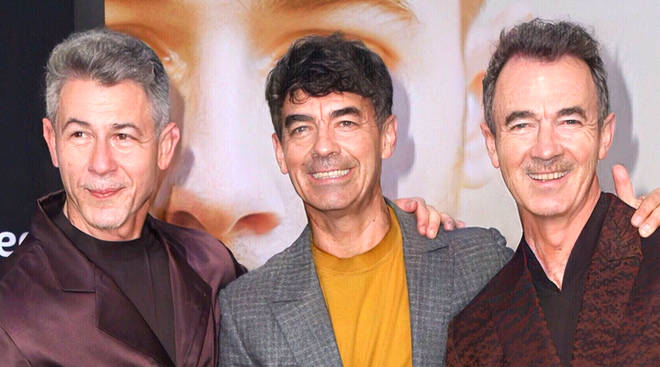

In [11]:
img_M = cv2.imread("/content/multiple.jpeg")
cv2_imshow(img_M)

# Face Detection

In [12]:
face_detection_path = "/content/drive/MyDrive/CV_Project/DSFD/folder/face_detection_dsfd/"

In [13]:
%cd $face_detection_path

/content/drive/.shortcut-targets-by-id/1gnomF_YYKjV23FhDkHCIFHqu2CmiglDA/CV_Project/DSFD/folder/face_detection_dsfd


In [14]:
%ls

cache_images.py                 demo_video_traced_batch.py  __init__.py
cache_video_batch.py            demo_video_traced.py        layers/
cache_video_batch_recursive.py  export.py                   LICENSE
cache_video.py                  face_detector.py            model/
data/                           face_ssd_infer.py           __pycache__/
demo.py                         face_ssd.py                 README.md
demo_video_infer_batch.py       fddb_test.py                utils/
demo_video.py                   imgs/                       widerface_val.py


In [15]:
def getFaceImg(img,count):

  sys.path.append('/content/drive/MyDrive/CV_Project/DSFD/folder/face_detection_dsfd')
  # from  import demo
  import demo

  # print(demo.test_oneimage(img,0,[0.5],0,count))
  x = demo.test_oneimage(img,0,[0.5],0,count)

  if x is None:
    return x
  
  face_detection,_ = x

  return face_detection

In [16]:
# import demo
# (face_detection),_ = demo.test_oneimage(img,0,[0.5],0,0)

In [18]:
# face_detection

In [19]:
x,y,h,w = getFaceImg(img,0)[0]
x,y,h,w = int(x),int(y),int(h),int(w)

print(x, y, h, w)

loading pretrained resnet model
Finished loading model!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


249 81 333 220


In [20]:
img1 = np.copy(img)

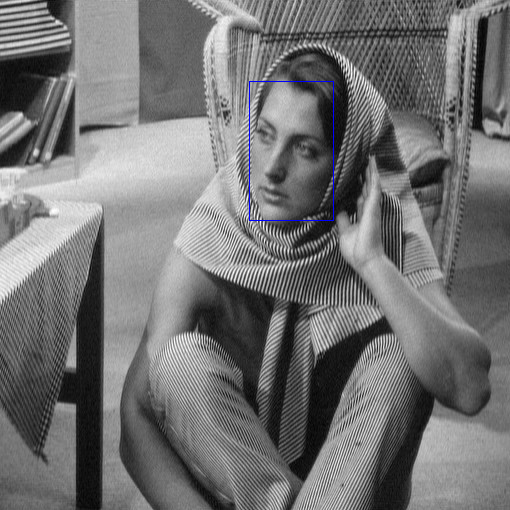

In [21]:
cv2_imshow(cv2.rectangle(img1,(x,y),(h,w),(255,0,0)))

ERROR: You specified size [255, 255]. However, currently only SSD640 (size=640) is supported!
loading pretrained resnet model
Finished loading model!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


495 57 598 213
55 77 154 228
281 80 378 208


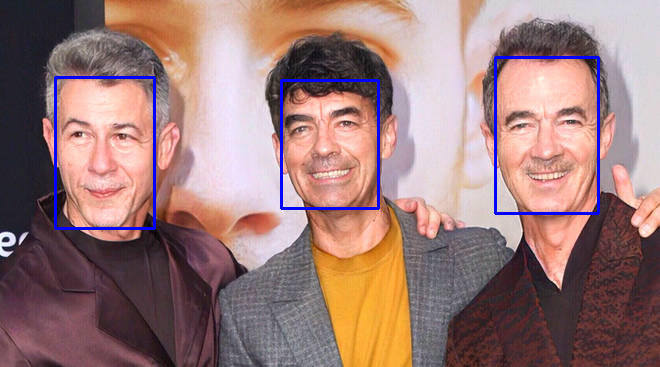

In [22]:
img1_M = np.copy(img_M)
counter = 0
for faces in getFaceImg(img_M, counter):
  x_m,y_m,h_m,w_m = faces
  x_m,y_m,h_m,w_m = int(x_m),int(y_m),int(h_m),int(w_m)
  print(x_m, y_m, h_m, w_m)
  cv2.rectangle(img1_M,(x_m,y_m),(h_m,w_m),(255,0,0), 2)
  counter += 1

cv2_imshow(img1_M)



In [23]:
# for (x,y,w,h) in getFaceImg(img_M):
#   print(x,y,w,h)

#Calculate Face Embeddings

In [24]:
%cd /content/drive/MyDrive/CV_Project/LightCNN/folder

/content/drive/.shortcut-targets-by-id/1gnomF_YYKjV23FhDkHCIFHqu2CmiglDA/CV_Project/LightCNN/folder


In [25]:
import extract_embeddings_single_image
def getEmbed_from_img(img):
  embedding_img = extract_embeddings_single_image.calculate_embeddings(img)
  return embedding_img

In [26]:
tmp_embed = getEmbed_from_img(img)
print(tmp_embed.shape)


(256,)


#Video Camera Helpers

In [27]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [28]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [29]:
import imquality.brisque as brisque

def calc_img_embeddings(path):
  c = 0
  for file in os.listdir(path):
    d = os.path.join(path, file)
    # print(d)
    # continue
    img = cv2.imread(d)
    name_img = getImgName(d)
    x,y,h,w = getFaceImg(img, 0)[0]
    x,y,h,w = int(x),int(y),int(h),int(w)
    finImg = img[y:w, x:h]
    bs = brisque.score(finImg)

    if(bs <= 30):
      embed_img = getEmbed_from_img(finImg)
    # embed_img = [1,2,3,4,5]
      saveToCsv(name_img, embed_img)
    else:
      print('Image: ' + name_img + " is of poor quality. Please upload better quality image!!!")
    c += 1

In [37]:
calc_img_embeddings(dataset_path)

Shivam_Sharma
ERROR: You specified size [240, 320]. However, currently only SSD640 (size=640) is supported!
loading pretrained resnet model
Finished loading model!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/imquality/brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)



['Shivam_Sharma', 32.718502, 23.169275, -15.86905, 5.6150665, 8.618458, 1.9707265, 11.975099, -10.350746, -11.604842, 3.4300723, 21.904238, 11.577869, -3.2269614, 14.390921, 0.63908607, 2.2046127, -27.538124, 11.311783, -6.452668, -17.386475, 7.028721, 11.589683, 14.876192, 16.57739, 0.4434636, 11.47827, 4.1137967, -13.636345, -15.8310995, 1.237733, -10.934517, 26.274763, -16.748251, 4.100876, -4.714986, -8.921723, -6.100213, -21.985407, -4.1706867, 11.879316, -13.770951, -7.4639, -17.612656, 5.3437767, 5.8685894, -6.6217265, 12.143227, -20.019, -1.945514, -21.191208, -8.270149, -6.2074575, -19.007338, 20.203573, -39.167763, 10.752305, 14.972676, 7.015527, -6.7153125, 15.853004, -6.6893926, -18.184715, 14.39323, -7.595301, -1.9728966, -14.54798, 9.977386, 0.7755224, -7.166787, -5.7350883, -9.733198, -3.6245515, -14.384782, 15.504325, -19.605911, 11.774925, -1.6745569, 2.7350276, -16.659922, -6.3700037, -13.255809, -6.592722, 4.0125084, 1.0180259, -7.640163, -4.2538476, 4.39283, 4.9713

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/imquality/brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)



['Barbara', 6.5682306, 2.6345136, 2.9745295, 9.455711, -13.805844, 12.570444, -11.305019, 8.582526, 0.91438323, 3.2031314, 0.567411, -10.400915, -9.241121, -5.5661964, -14.542294, -17.408768, -13.338946, 14.241839, 8.043736, 22.755144, 33.893898, 11.575838, -1.1006851, 10.810317, -4.6470356, 2.2748506, -9.242402, -6.375196, -13.417687, -14.608524, 13.941933, -2.132988, 1.8473606, -3.3774695, 13.128322, -5.2540827, -13.511133, 6.134285, -1.7107956, 1.294806, 1.1172049, 10.374743, 7.3135448, -2.1804976, -2.2304833, -26.858173, 0.2784595, -6.9692698, 5.2248874, 3.951108, 17.36751, -6.8690357, 0.24198666, 16.279179, -5.1278744, 8.420605, -7.123517, 5.044873, 7.479515, 14.248531, 7.1424847, -11.536023, 10.104272, 12.229134, -8.508895, 7.827638, -9.398226, 1.0697348, 23.746723, 17.445171, 0.5911516, -11.590518, -6.889707, -12.468684, -3.2808003, 6.3623424, 5.173629, -6.8110313, 2.5221608, -16.863468, 3.838071, -2.0106728, 7.039975, -13.741041, -5.116828, 11.580678, -14.638632, -2.0296423, -

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/imquality/brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


Image: Kate is of poor quality. Please upload better quality image!!!
Rihanna
ERROR: You specified size [140, 192]. However, currently only SSD640 (size=640) is supported!
loading pretrained resnet model
Finished loading model!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/imquality/brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)



['Rihanna', 2.5843377, 9.811235, -6.362113, -7.4426756, -2.0530815, -6.72506, 13.099581, 3.3197348, -20.082355, 5.510322, 0.4107863, -8.034281, 12.98258, 1.2135708, 10.713644, 1.2324475, -3.3109138, 9.139192, -7.804886, 14.490138, 4.9545274, 7.973497, 14.49161, -1.1689305, 20.975536, -5.081238, -5.894762, 5.839843, 19.089315, -4.1630373, 2.358977, 6.5258484, -1.2812754, -12.731533, 8.017459, 5.6230845, 7.792456, -14.889594, 1.30757, -6.7385983, -5.804933, 8.513786, -15.936934, -0.79099774, 1.016018, 7.460163, 0.19975206, 2.938039, 6.2465115, -4.205786, -1.2796491, -11.213017, -23.630249, -16.278353, -7.1517463, 1.5842602, 17.592026, 9.580484, 19.86333, -6.86573, -2.997121, 2.5395691, -8.823031, -11.949705, 7.9172635, -0.21770659, -4.180462, 6.7744813, -4.819378, 7.1475153, 16.702848, -3.829195, -4.8592625, -8.058542, -12.4792185, -8.952623, 1.271397, 9.124209, 0.93772525, 27.53556, -12.014759, 22.17236, -3.4736662, -0.81028825, -5.883637, 3.4111657, -4.1335454, 0.48917297, -3.5551429,

In [38]:
columns, dataset_embeddings = getEmbeddingfromCSV()

In [39]:
print(columns)
print(dataset_embeddings)
print(dataset_embeddings[0])

['Name', 'Embedding_0', 'Embedding_1', 'Embedding_2', 'Embedding_3', 'Embedding_4', 'Embedding_5', 'Embedding_6', 'Embedding_7', 'Embedding_8', 'Embedding_9', 'Embedding_10', 'Embedding_11', 'Embedding_12', 'Embedding_13', 'Embedding_14', 'Embedding_15', 'Embedding_16', 'Embedding_17', 'Embedding_18', 'Embedding_19', 'Embedding_20', 'Embedding_21', 'Embedding_22', 'Embedding_23', 'Embedding_24', 'Embedding_25', 'Embedding_26', 'Embedding_27', 'Embedding_28', 'Embedding_29', 'Embedding_30', 'Embedding_31', 'Embedding_32', 'Embedding_33', 'Embedding_34', 'Embedding_35', 'Embedding_36', 'Embedding_37', 'Embedding_38', 'Embedding_39', 'Embedding_40', 'Embedding_41', 'Embedding_42', 'Embedding_43', 'Embedding_44', 'Embedding_45', 'Embedding_46', 'Embedding_47', 'Embedding_48', 'Embedding_49', 'Embedding_50', 'Embedding_51', 'Embedding_52', 'Embedding_53', 'Embedding_54', 'Embedding_55', 'Embedding_56', 'Embedding_57', 'Embedding_58', 'Embedding_59', 'Embedding_60', 'Embedding_61', 'Embeddin

In [33]:
def calcDistance(embedList, img_embedList):
  dist = []
  for x in embedList:
    result = 1 - spatial.distance.cosine(x[1], img_embedList)
    dist.append(result)
    id = np.argmax(dist)
    if(dist[id] >= 0.6):
      return id
    else:
      return -1

In [ ]:
finalNameInd = calcDistance(dataset_embeddings, tmp_embed)
if finalNameInd != -1:
  print(dataset_embeddings[finalNameInd][0])
else:
  print("Match Not Found")

In [40]:
video_stream()

label_html = 'Taking Attendance'

bbox = ''
count = 0 

while True:
  js_reply = video_frame(label_html, bbox)
  if not js_reply:
    break
  img = js_to_image(js_reply["img"])
  
  bbox_array = np.zeros([480,640,4], dtype=np.uint8)
  # faces = getFaceImg(img_M,count)

  # BBOX caluclated
  face_bbox = getFaceImg(img,count)

  # print('Hey!: ', face_bbox)

  count += 1

  if face_bbox is None:
    continue

  for (x,y,h,w) in face_bbox:
    x,y,h,w = int(x),int(y),int(h),int(w)
    bbox_array = cv2.rectangle(bbox_array,(int(x),int(y)),(int(h),int(w)),(255,0,0),2)
    finImg = img[y:w, x:h]
    #Embedding Calculated
    embed_img = getEmbed_from_img(finImg)
    # print(embed_img)
    # Final Match Returned
    finalNameInd = calcDistance(dataset_embeddings, embed_img)
    # print(dataset_embeddings[finalNameInd][0])
    # Attendence Record Updated
    if(finalNameInd != -1):
      takeAttendance(dataset_embeddings[finalNameInd][0])
  
  bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
  # convert overlay of bbox into bytes
  bbox_bytes = bbox_to_bytes(bbox_array)
  # update bbox so next frame gets new overlay
  bbox = bbox_bytes

<IPython.core.display.Javascript object>

ERROR: You specified size [172, 160]. However, currently only SSD640 (size=640) is supported!
loading pretrained resnet model
Finished loading model!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2351: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
